# Практическая работа №4

## Деревья решений
Выполнил: Самарин Никита КИ21-17/2Б

## Цель работы
Знакомство с теоретическими основами построения деревьев
решений, формирование навыков построения деревьев решений для решения
задач классификации и регрессии с помощью языка программирования
Python

## Задачи:
#### Выполнение практической работы предполагает решение следующий задач:
1. Предварительная обработку исходных данных
2. Построение базовых моделей на основе деревьев решений
3. Подбор оптимальных параметров моделей
4. Оценка качества построенных моделей на валидационной/тестовой
выборке

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import utilities

warnings.filterwarnings("ignore")

In [2]:
regr_cat_attributes = ['Мусоропровод', 'Аварийный', 'Железобетонные.перекрытия', 'Смешанные.перекрытия', 'Деревянные.перекрытия', 'Иные.перекрытия', 'Панельные.стены', 'Блочные.стены', 'Деревянные.стены', 'Кирпичные.стены', 'Монолитные.стены', 'Смешанные.стены', 'Косметический', 'Евроремонт', 'Дизайнерский', 'Без.ремонта', 'Парковка', 'Студия']
regr_num_attributes = ['Количество.комнат', 'Общая.площадь', 'Этаж', 'Этажей.в.доме', 'Год.постройки', 'Школа.1000', 'ВУЗ.1000', 'ТЦ.1000', 'Стоматология.1000', 'Почта.1000', 'Поликлиника.1000', 'Парк.1000', 'Остановка.1000', 'Одежда..1000', 'Супер3кет.1000', 'Кинотеатр.1000', 'Кафе.1000', 'АЗС.1000', 'Детский.сад.1000', 'Бар.1000', 'Банк.1000', 'Аптека.1000', 'Балкон', 'Лоджия', 'Совмещенный.санузел', 'Раздельный.санузел', 'Лифт', 'Грузовой.лифт']
regr_class = 'Цена'

train_regr = pd.read_csv("train_regr.csv", usecols = regr_cat_attributes + regr_num_attributes + [regr_class])

clas_cat_attributes = ['Sex', 'HasPartner', 'HasChild', 'HasPhoneService', 'HasMultiplePhoneNumbers', 'HasInternetService', 'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription', 'HasContractPhone', 'IsBillingPaperless', 'PaymentMethod']
clas_num_attributes = ['ClientPeriod', 'MonthlySpending', 'TotalSpent', 'IsSeniorCitizen']
clas_class = 'Churn'

train_clas =  pd.read_csv("train_clas.csv", usecols = clas_cat_attributes + clas_num_attributes + [clas_class])

### Предварительная обработка

#### Предобработка данных регрессии

In [3]:
train_regr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    int64  
 4   Этажей.в.доме              808 non-null    int64  
 5   Парковка                   808 non-null    int64  
 6   Без.ремонта                808 non-null    int64  
 7   Дизайнерский               808 non-null    int64  
 8   Евроремонт                 808 non-null    int64  
 9   Косметический              808 non-null    int64  
 10  Балкон                     808 non-null    int64  
 11  Лоджия                     808 non-null    int64  
 12  Совмещенный.санузел        808 non-null    int64  
 13  Раздельный.санузел         808 non-null    int64  

In [4]:
to_drop = ["Без.ремонта", "Совмещенный.санузел", "Иные.перекрытия"]
train_regr.drop(to_drop, inplace=True, axis=1)
for i in to_drop:
    if i in regr_num_attributes:
        regr_num_attributes.remove(i)
    elif i in regr_cat_attributes:
        regr_cat_attributes.remove(i)

In [5]:
train_regr[regr_num_attributes + [regr_class]] = train_regr[regr_num_attributes + [regr_class]].apply(pd.to_numeric, errors="coerce")

In [6]:
print(train_regr.isnull().sum())

Количество.комнат            0
Студия                       0
Общая.площадь                0
Этаж                         0
Этажей.в.доме                0
Парковка                     0
Дизайнерский                 0
Евроремонт                   0
Косметический                0
Балкон                       0
Лоджия                       0
Раздельный.санузел           0
Лифт                         0
Грузовой.лифт                0
Мусоропровод                 0
Год.постройки                0
Аварийный                    0
Железобетонные.перекрытия    0
Смешанные.перекрытия         0
Деревянные.перекрытия        0
Панельные.стены              0
Блочные.стены                0
Деревянные.стены             0
Кирпичные.стены              0
Монолитные.стены             0
Смешанные.стены              0
Школа.1000                   0
ВУЗ.1000                     0
ТЦ.1000                      0
Стоматология.1000            0
Почта.1000                   0
Поликлиника.1000             0
Парк.100

In [7]:
train_regr_x = train_regr[regr_cat_attributes + regr_num_attributes]
train_regr_y = train_regr[regr_class]
train_regr_x_train, train_regr_x_test, train_regr_y_train, train_regr_y_test = train_test_split(train_regr_x, train_regr_y, test_size=0.3, random_state=42)

#### Предобработка данных классификации

In [8]:
train_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              3169 non-null   int64  
 1   MonthlySpending           3169 non-null   float64
 2   TotalSpent                3169 non-null   object 
 3   Sex                       3169 non-null   object 
 4   IsSeniorCitizen           3169 non-null   int64  
 5   HasPartner                3169 non-null   object 
 6   HasChild                  3169 non-null   object 
 7   HasPhoneService           3169 non-null   object 
 8   HasMultiplePhoneNumbers   3169 non-null   object 
 9   HasInternetService        3169 non-null   object 
 10  HasOnlineSecurityService  3169 non-null   object 
 11  HasOnlineBackup           3169 non-null   object 
 12  HasDeviceProtection       3169 non-null   object 
 13  HasTechSupportAccess      3169 non-null   object 
 14  HasOnlin

In [9]:
train_clas[clas_num_attributes + [clas_class]] = train_clas[clas_num_attributes + [clas_class]].apply(pd.to_numeric, errors="coerce")

In [10]:
print(train_clas.isnull().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  6
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


In [11]:
train_clas = train_clas.fillna(train_clas['TotalSpent'].mean())

In [12]:
label_encoder = LabelEncoder()
for column in clas_cat_attributes:
    train_clas[column] = label_encoder.fit_transform(train_clas[column])

In [13]:
train_clas_x = train_clas[clas_cat_attributes + clas_num_attributes]
train_clas_y = train_clas[clas_class]
train_clas_x_train, train_clas_x_test, train_clas_y_train, train_clas_y_test = train_test_split(train_clas_x, train_clas_y, test_size=0.3, random_state=42)

### Обучение моделей

#### Дерево регрессии

Лучшая модель с параметром max_depth DecisionTreeRegressor(max_depth=5, random_state=42)
Результат: 399757.4001
Лучшая модель с параметром min_samples_split DecisionTreeRegressor(min_samples_split=78, random_state=42)
Результат: 397489.6686
Лучшая модель с параметром min_samples_leaf DecisionTreeRegressor(min_samples_leaf=20, random_state=42)
Результат: 376734.4365
Лучшая модель с параметром max_leaf_nodes DecisionTreeRegressor(max_leaf_nodes=37, random_state=42)
Результат: 403703.0470
Лучшая модель с 4 параметрами DecisionTreeRegressor(max_depth=5, max_leaf_nodes=37, min_samples_leaf=20,
                      min_samples_split=78, random_state=42)
Результат: 404766.9814


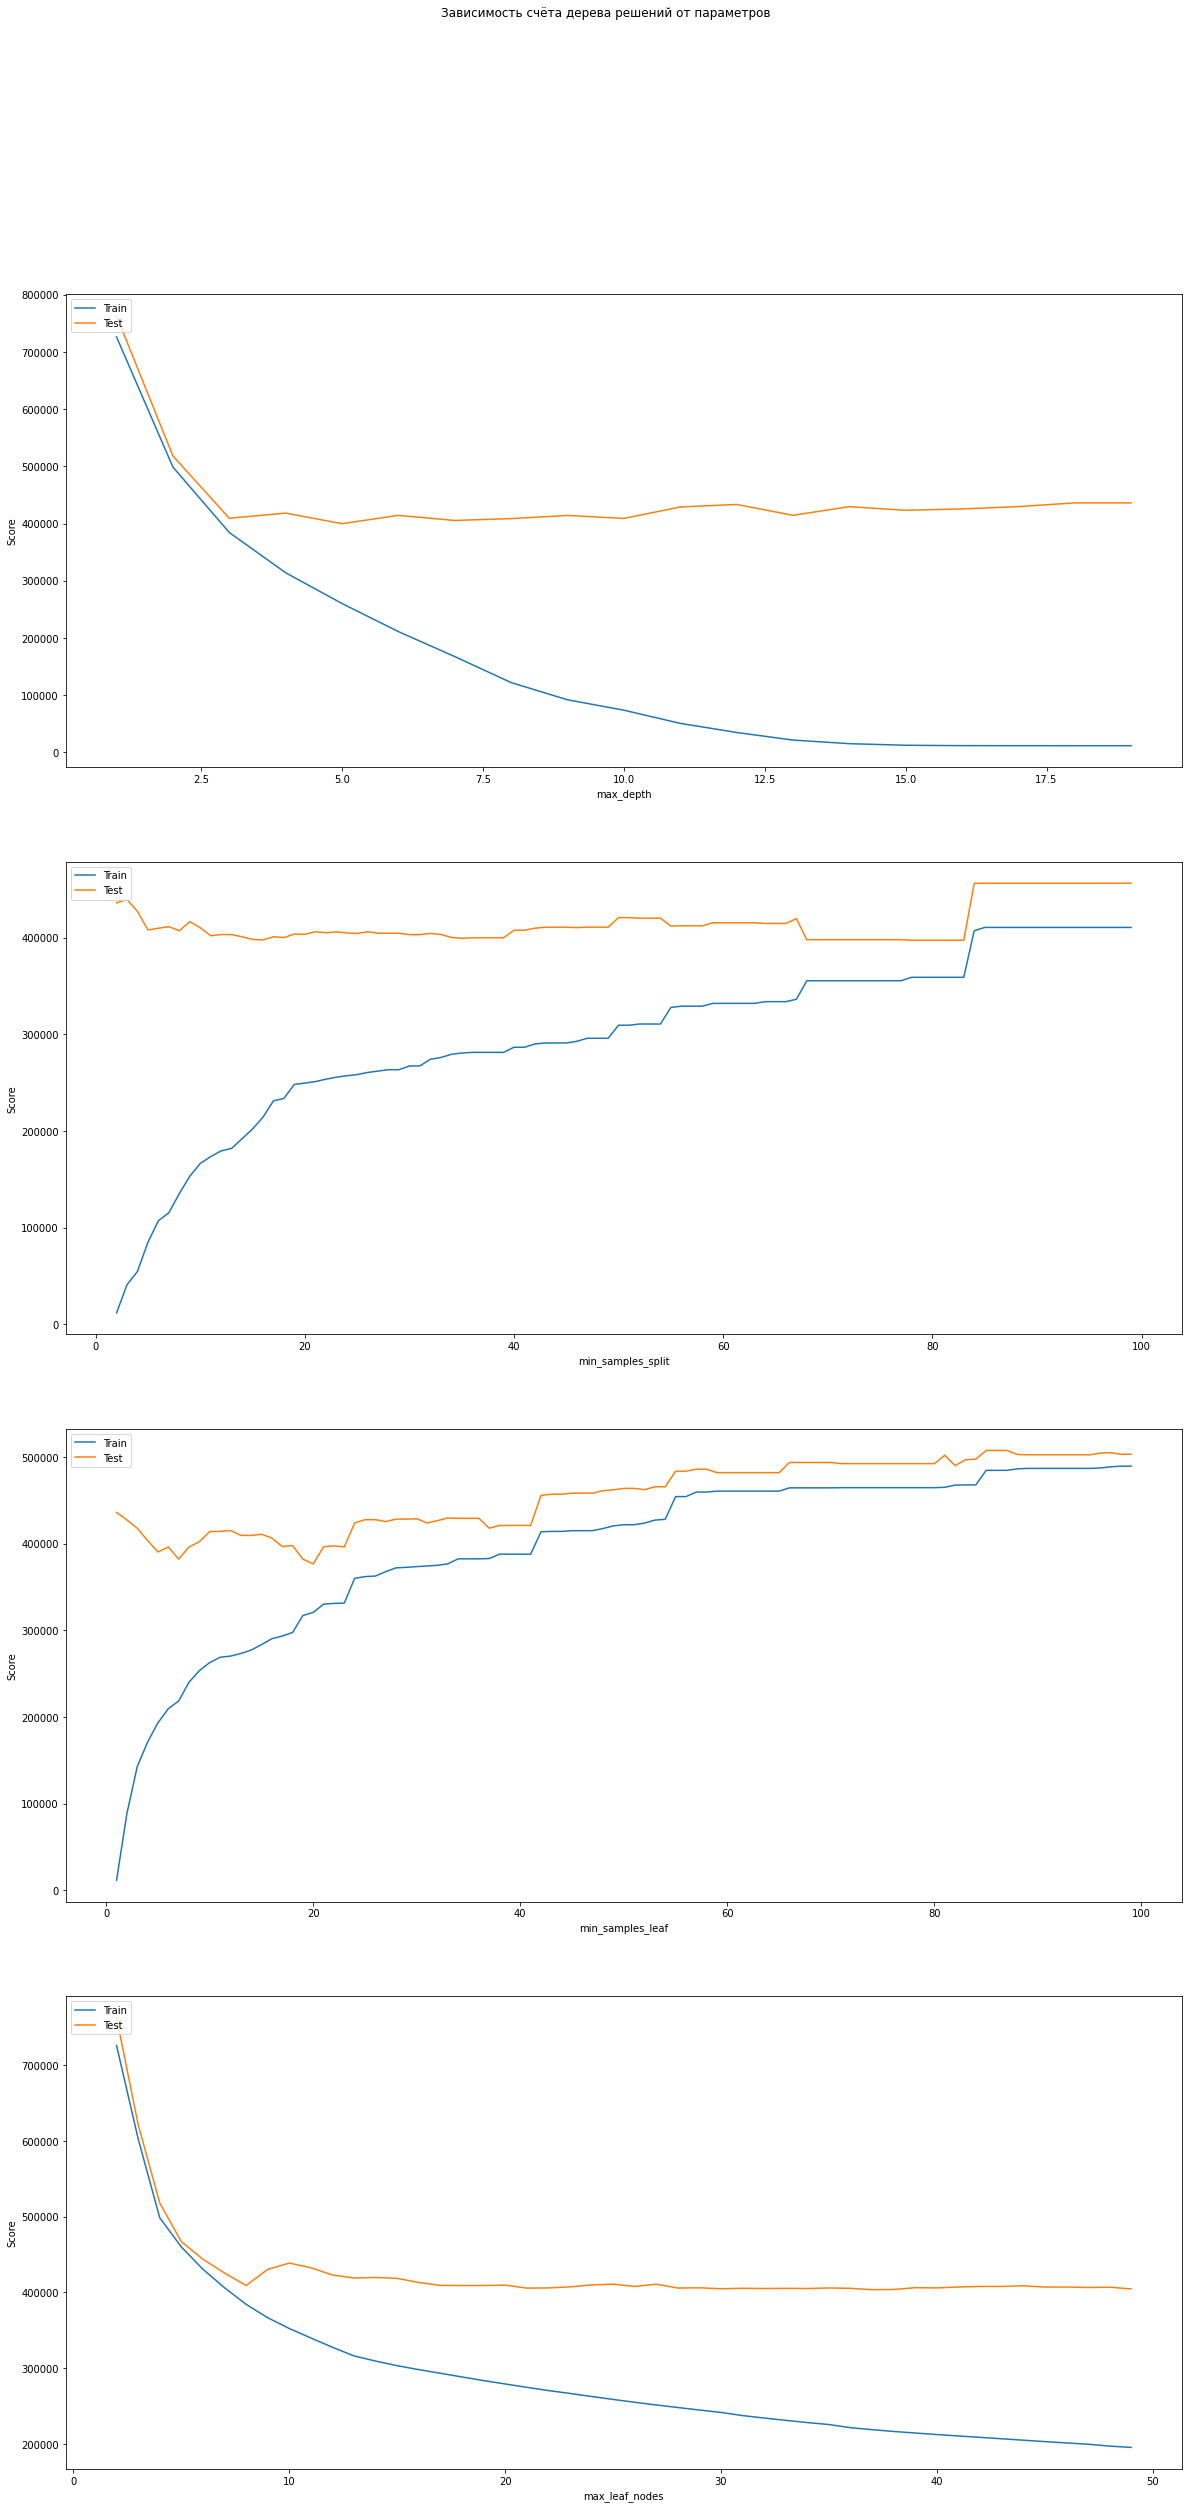

In [14]:
params = {
    'max_depth': list(range(1, 20)),
    'min_samples_split': list(range(2, 100)),
    'min_samples_leaf': list(range(1, 100)),
    'max_leaf_nodes': list(range(2, 50))
}

_ = utilities.tree_regr_train(params, train_regr_x_train, train_regr_y_train, train_regr_x_test, train_regr_y_test)

#### Дерево классификации

Лучшая модель с параметром max_depth DecisionTreeClassifier(max_depth=5, random_state=42)
Результат: 0.8115
Лучшая модель с параметром min_samples_split DecisionTreeClassifier(min_samples_split=94, random_state=42)
Результат: 0.8106
Лучшая модель с параметром min_samples_leaf DecisionTreeClassifier(min_samples_leaf=59, random_state=42)
Результат: 0.8294
Лучшая модель с параметром max_leaf_nodes DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)
Результат: 0.8273
Лучшая модель с 4 параметрами DecisionTreeClassifier(max_depth=5, max_leaf_nodes=17, min_samples_leaf=59,
                       min_samples_split=94, random_state=42)
Результат: 0.7170


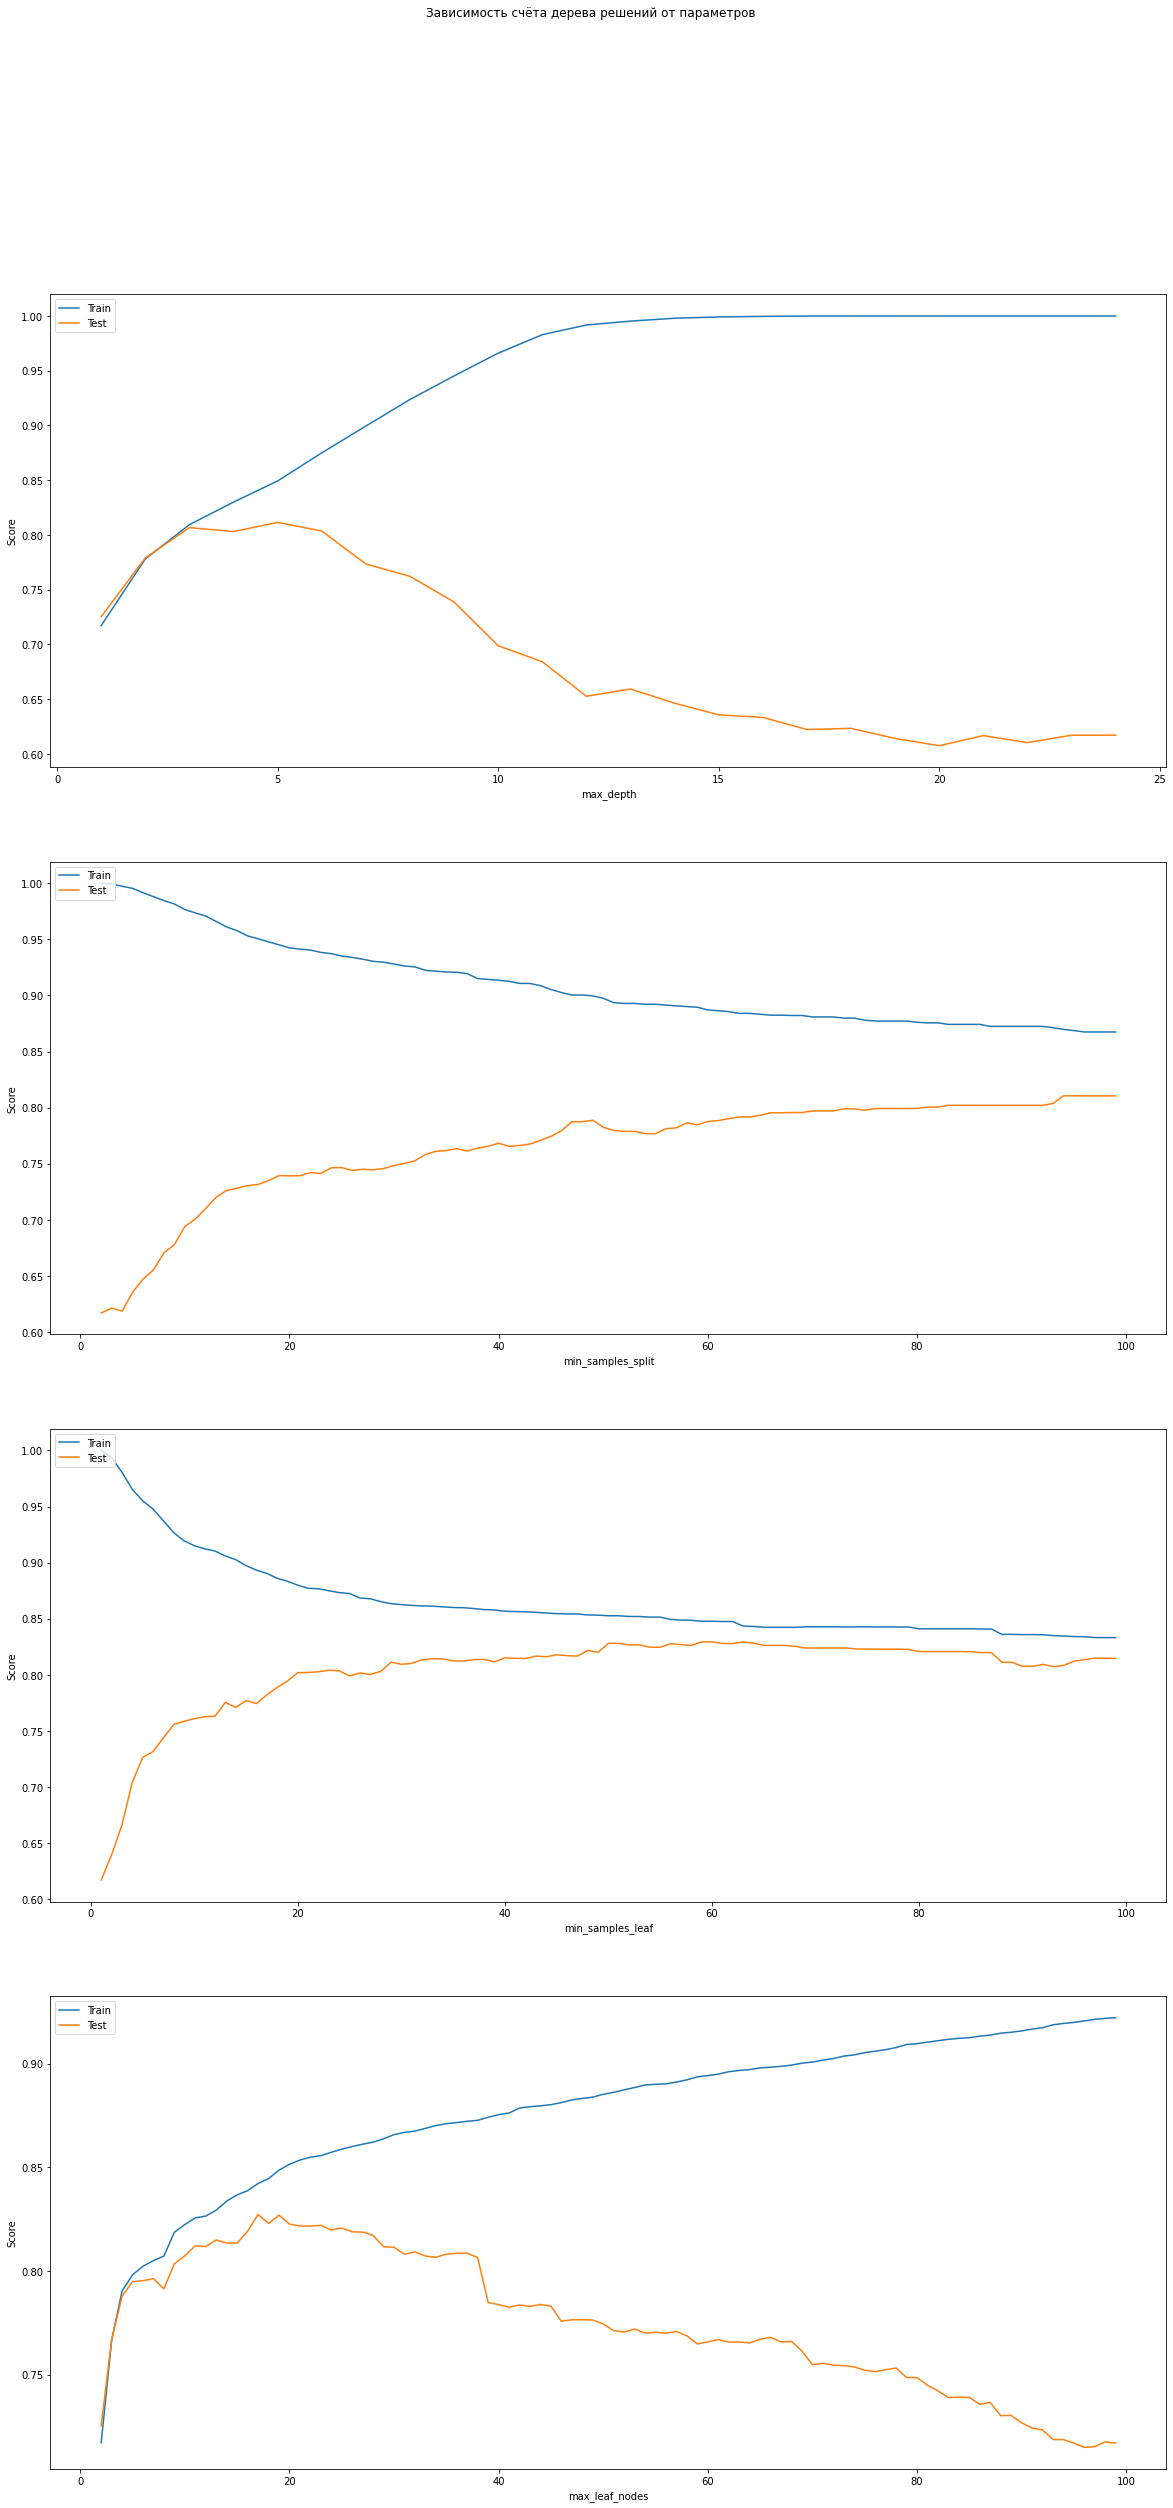

In [15]:
params = {
    'max_depth': list(range(1, 25)),
    'min_samples_split': list(range(2, 100)),
    'min_samples_leaf': list(range(1, 100)),
    'max_leaf_nodes': list(range(2, 100))
}

_ = utilities.tree_clas_train(params, train_clas_x_train, train_clas_y_train, train_clas_x_test, train_clas_y_test)

### Обрезка деревьев

#### Дерево регрессии

Tuned hpyerparameters (best parameters): {'max_depth': 7, 'max_leaf_nodes': 42, 'min_samples_leaf': 11, 'min_samples_split': 2}
DecisionTreeRegressor(max_depth=7, max_leaf_nodes=42, min_samples_leaf=11,
                      random_state=42)


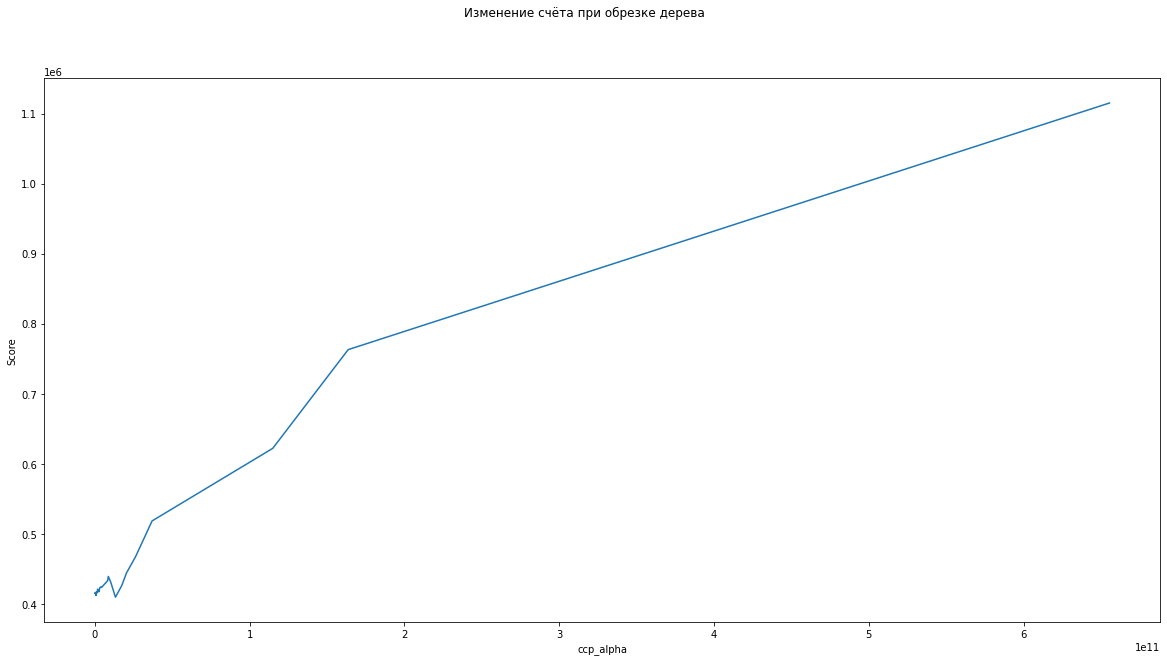

In [16]:
params = {
    'max_depth': list(range(1, 20, 2)),
    'min_samples_split': list(range(2, 100, 10)),
    'min_samples_leaf': list(range(1, 100, 10)),
    'max_leaf_nodes': list(range(2, 50, 10))
}
params = utilities.grid_search_regr(params, train_regr_x_train, train_regr_y_train)
tree_regr = DecisionTreeRegressor(random_state=42)
tree_regr = tree_regr.set_params(**params)
path = tree_regr.cost_complexity_pruning_path(train_regr_x_train, train_regr_y_train)
ccp_alphas = path.ccp_alphas
print(tree_regr)
tree_regr, rmse, r2 = utilities.regr_tree_pruning(tree_regr, ccp_alphas, train_regr_x_train, train_regr_y_train, train_regr_x_test, train_regr_y_test)

#### Дерево классификации

Tuned hpyerparameters (best parameters): {'max_depth': 7, 'max_leaf_nodes': 22, 'min_samples_leaf': 21, 'min_samples_split': 92}
DecisionTreeClassifier(max_depth=7, max_leaf_nodes=22, min_samples_leaf=21,
                       min_samples_split=92, random_state=42)


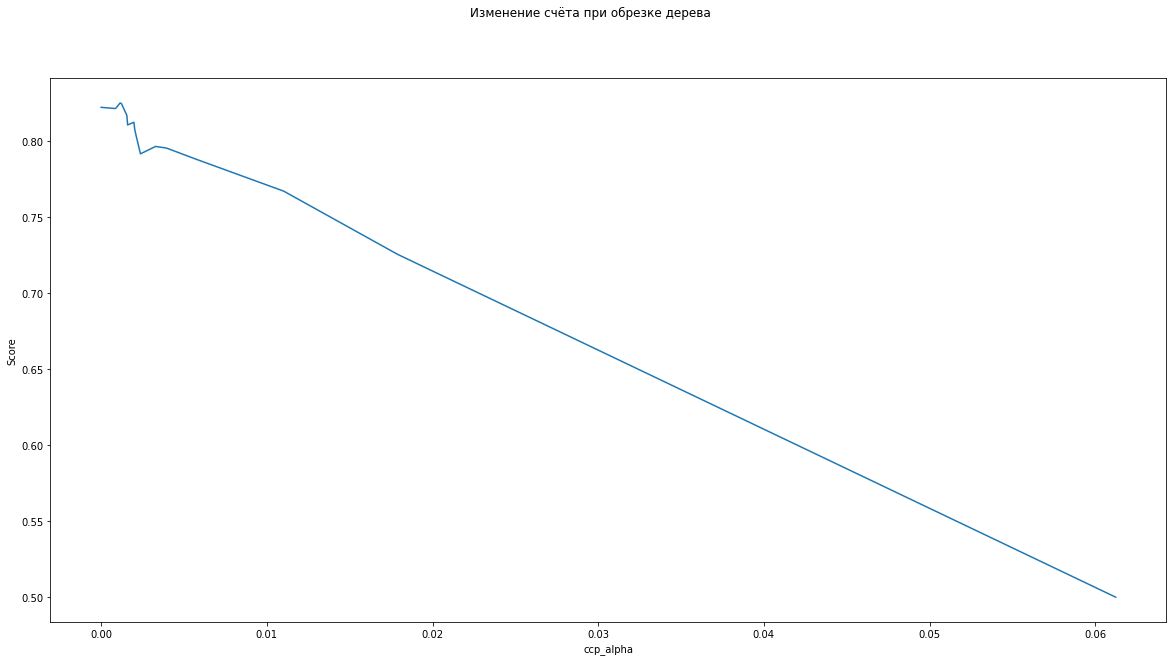

In [18]:
params = {
    'max_depth': list(range(1, 25, 3)),
    'min_samples_split': list(range(2, 100, 10)),
    'min_samples_leaf': list(range(1, 100, 10)),
    'max_leaf_nodes': list(range(2, 100, 10))
}
params = utilities.grid_search_clas(params, train_clas_x_train, train_clas_y_train)
tree_clas = DecisionTreeClassifier(random_state=42)
tree_clas = tree_clas.set_params(**params)
path = tree_clas.cost_complexity_pruning_path(train_clas_x_train, train_clas_y_train)
print(tree_clas)
ccp_alphas = path.ccp_alphas
tree_clas, score_clas = utilities.clas_tree_pruning(tree_clas, ccp_alphas, train_clas_x_train, train_clas_y_train, train_clas_x_test, train_clas_y_test)

### Сравним модели

#### Модели регрессии

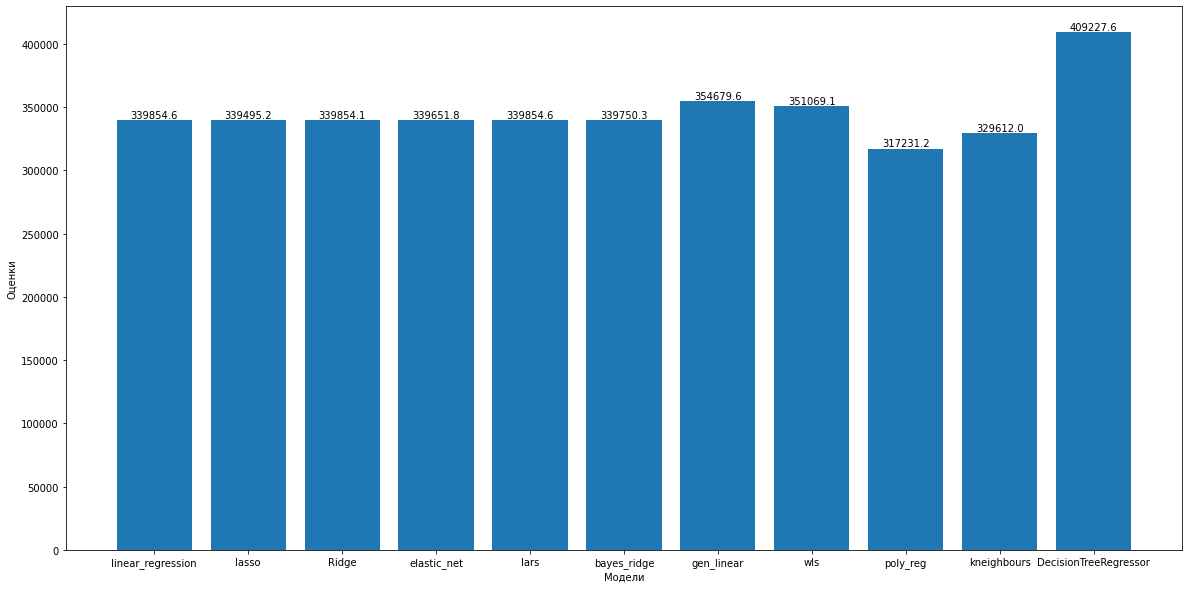

In [20]:
RMSEs = [339854.6, 339495.2, 339854.1, 339651.8, 339854.6, 339750.3, 354679.6, 351069.1, 317231.2, 329612.0, rmse // 0.1 / 10]
labels = ['linear_regression', 'lasso', 'Ridge', 'elastic_net', 'lars', 'bayes_ridge', 'gen_linear', 'wls', 'poly_reg', 'kneighbours', 'DecisionTreeRegressor']
utilities.build_bar_plot(labels, RMSEs)

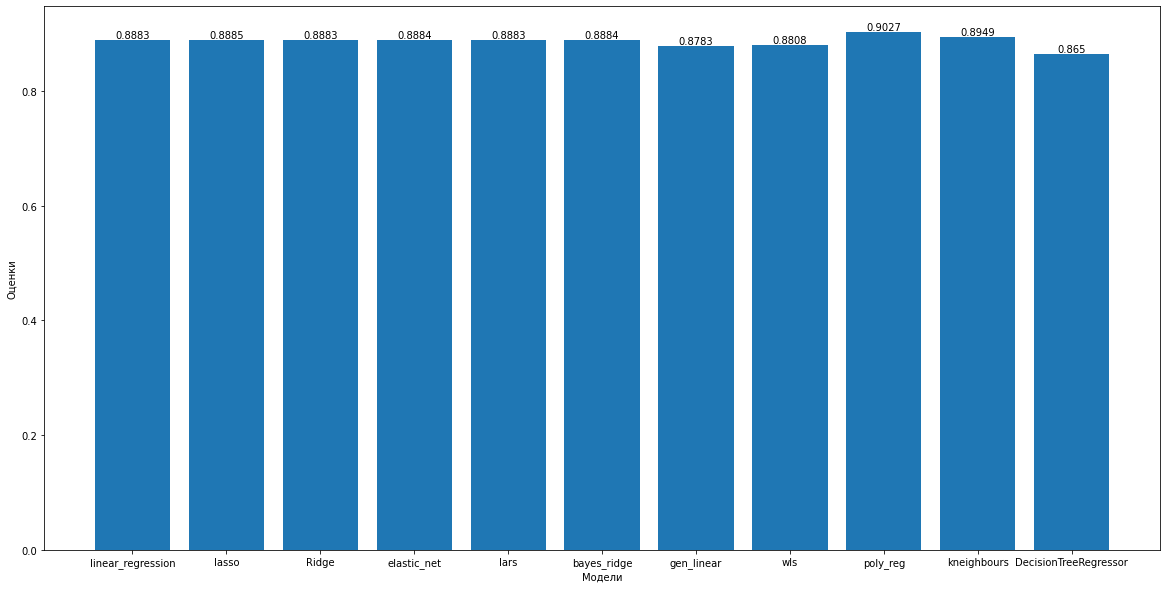

In [21]:
r2s = [0.8883, 0.8885, 0.8883, 0.8884, 0.8883, 0.8884, 0.8783, 0.8808, 0.9027, 0.8949, r2 // 0.0001 / 10000]
utilities.build_bar_plot(labels, r2s)

#### Модели классификации

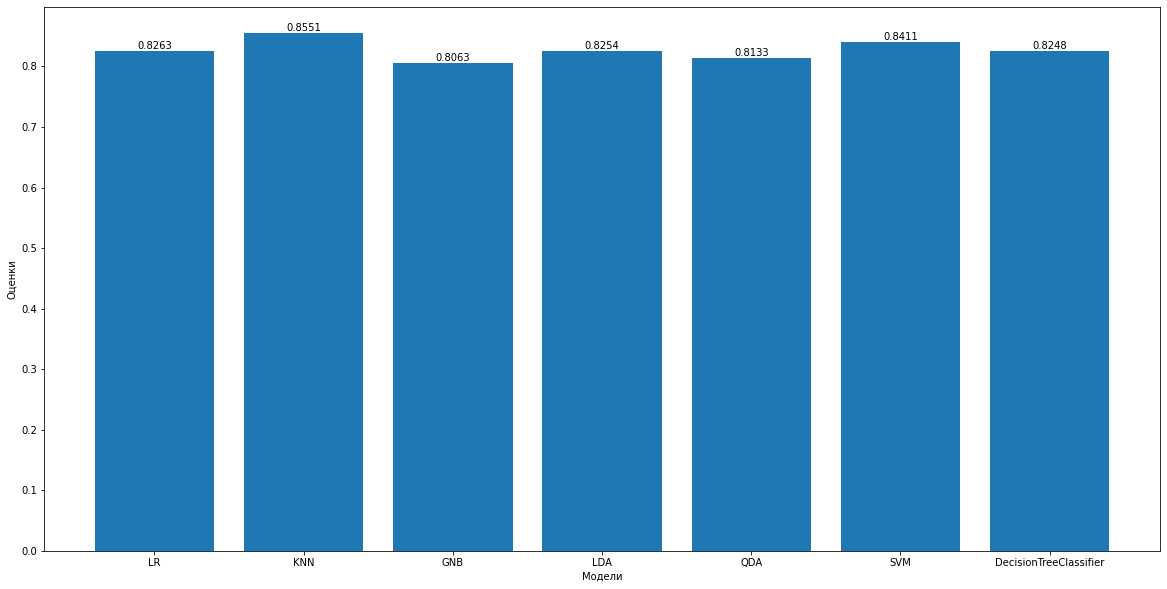

In [22]:
labels = ['LR', 'KNN', 'GNB', 'LDA', 'QDA', 'SVM', 'DecisionTreeClassifier']
scores = [0.8263, 0.8551, 0.8063, 0.8254, 0.8133, 0.8411, score_clas // 0.0001 / 10000]
utilities.build_bar_plot(labels, scores)